# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import csv
import json
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#openweather base url for API a list to append answers(data)
weather_url = 'http://api.openweathermap.org/data/2.5/weather?q='
responses = []
city_name = []
city_id = []
country = []
lat = []
lon = []
date = []
max_temp = []
humid = []
cloud = []
wind = []


for city in cities:
    try:
        weather_data = requests.get(f'{weather_url}{city}&appid={weather_api_key}&units=imperial').json()
        responses.append(weather_data)
        city_name.append(weather_data['name'])
        city_id.append(weather_data['id'])
        country.append(weather_data['sys']['country'])
        lat.append(weather_data['coord']['lat'])
        lon.append(weather_data['coord']['lon'])
        date.append(weather_data['dt'])
        max_temp.append(weather_data['main']['temp_max'])
        humid.append(weather_data['main']['humidity'])
        cloud.append(weather_data['clouds']['all'])
        wind.append(weather_data['wind']['speed'])
        
        print(f" getting Data for the City of: {city}, {country} , ID: {weather_data['id']}")
        #pause pull by seconds
        time.sleep(1.1)
    
    except:
        print(f"{city} not found")
        pass      
    #pause pull by seconds
    time.sleep(1.1)


 City: atuona , ID: 4020109
mahaicony not found
 City: nagato , ID: 1899102
 City: yairipok , ID: 1252810
 City: castro , ID: 3466704
 City: arraial do cabo , ID: 3471451
 City: san andres , ID: 3670218
 City: ushuaia , ID: 3833367
 City: nizhnyaya omka , ID: 1497406
 City: bacolod , ID: 1729564
 City: lorengau , ID: 2092164
 City: dikson , ID: 1507390
 City: pop , ID: 1513023
 City: jamestown , ID: 5122534
 City: port hedland , ID: 2063042
 City: hithadhoo , ID: 1282256
 City: gari , ID: 1506676
 City: kapaa , ID: 5848280
 City: qaanaaq , ID: 3831208
 City: new norfolk , ID: 2155415
 City: klerksdorp , ID: 989921
nizhneyansk not found
 City: pevek , ID: 2122090
 City: tuatapere , ID: 2180815
 City: camargo , ID: 4013724
 City: malumfashi , ID: 2331005
 City: sao filipe , ID: 3374210
 City: bethel , ID: 5282297
 City: bilibino , ID: 2126682
 City: juybar , ID: 129933
 City: muroto , ID: 1856392
 City: saskylakh , ID: 2017155
 City: meulaboh , ID: 1214488
 City: sinegorye , ID: 2121197


 City: tomakomai , ID: 2127733
 City: mount gambier , ID: 2156643
 City: anadyr , ID: 2127202
grand river south east not found
 City: loudeac , ID: 2997465
 City: cherskiy , ID: 2126199
 City: aloleng , ID: 1731298
 City: camana , ID: 3945985
 City: mwinilunga , ID: 902620
toliary not found
 City: geraldton , ID: 2070998
 City: berlevag , ID: 780687
tsihombe not found
 City: aasiaat , ID: 3424901
 City: lakes entrance , ID: 2160735
nguiu not found
 City: qinhuangdao , ID: 1797595
 City: saint-georges , ID: 3579925
 City: puerto colombia , ID: 3671497
 City: narsaq , ID: 3421719
 City: kavaratti , ID: 1267390
 City: bagdarin , ID: 2027244
 City: okmulgee , ID: 4544383
 City: la palma , ID: 5364022
 City: ladario , ID: 3459352
 City: souillac , ID: 933995
 City: tongchuan , ID: 1795196
 City: senno , ID: 497024
samusu not found
 City: lucca , ID: 3174529
 City: esperance , ID: 2071860
 City: hofn , ID: 2630299
 City: kawalu , ID: 1640902
 City: alofi , ID: 4036284
 City: sitka , ID: 5557

 City: goundam , ID: 2456917
 City: shilka , ID: 2016708
 City: altay , ID: 1529651
 City: shumskiy , ID: 1491977
 City: lumphat , ID: 1830377
 City: santo antonio do monte , ID: 3449500
 City: faanui , ID: 4034551
 City: miandrivazo , ID: 1059051
 City: teguise , ID: 2510573
 City: alamos , ID: 4018904
 City: grand gaube , ID: 934479
 City: shostka , ID: 693942
 City: okhotsk , ID: 2122605
 City: wodonga , ID: 2143285
 City: krasnoselkup , ID: 1502073
 City: covington , ID: 4288809
 City: mayo , ID: 4362001
tumannyy not found
 City: broome , ID: 5110365
 City: macedo de cavaleiros , ID: 2738082
 City: pullman , ID: 5807540
bargal not found
 City: loa janan , ID: 1637510
 City: huacho , ID: 3940002
cagayan de tawi-tawi not found
 City: kissidougou , ID: 2419472
 City: radhanpur , ID: 1259069
 City: vestmannaeyjar , ID: 3412093
mudyuga not found
 City: kwekwe , ID: 888710
 City: ulaangom , ID: 1515029
 City: taksimo , ID: 2015701
 City: rincon , ID: 4218882
 City: steinbach , ID: 282873

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
#Display DataFrame
clean_weather_df = pd.DataFrame({"City ID": city_id,"City Name": city_name,
                                "Country": country, "Latitude": lat, "Longitude": lon,
                                "Max Temperature": max_temp, "Humidity": humid, "Clouds": cloud,
                                "Wind Speed": wind, "Date": date
                                })
clean_weather_df.head()

,City ID,City Name,Country,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind Speed,Date
0,4020109,Atuona,PF,-9.8000,-139.0333,80.28,77,89,21.81,1612651136
1,1899102,Nagato,JP,34.3833,131.2000,48.20,93,75,3.44,1612651141
2,1252810,Yairipok,IN,24.6667,94.0667,46.78,79,0,1.34,1612651144
3,3466704,Castro,BR,-24.7911,-50.0119,62.64,68,0,6.91,1612650958
4,3471451,Arraial do Cabo,BR,-22.9661,-42.0278,71.60,94,75,3.44,1612651041


In [59]:
#count Cities
clean_weather_df.count()

City ID            567
City Name          567
Country            567
Latitude           567
Longitude          567
Max Temperature    567
Humidity           567
Clouds             567
Wind Speed         567
Date               567
dtype: int64

In [42]:
#export to CSV
clean_weather_df.to_csv("../output_data/city_weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [53]:
#  Get the indices of cities that have humidity over 100%.
cities_humid = clean_weather_df[clean_weather_df["Humidity"] >100].index
cities_humid

Int64Index([], dtype='int64')

In [54]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = clean_weather_df.drop(cities_humid, inplace=False)
clean_city_data.describe()

,City ID,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind Speed,Date
count,5.670000e+02,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,2.680935e+06,20.923610,20.051685,49.708995,72.881834,49.105820,8.499471,1.612652e+09
std,1.583563e+06,33.459916,91.284754,31.353623,20.594996,39.546807,6.030683,5.043479e+02
min,4.974700e+04,-54.800000,-175.200000,-39.510000,1.000000,0.000000,0.040000,1.612651e+09
25%,1.529514e+06,-7.610700,-60.409550,30.490000,64.000000,3.500000,4.000000,1.612652e+09
50%,2.189343e+06,25.350000,22.154700,60.800000,78.000000,40.000000,6.910000,1.612652e+09
75%,3.658860e+06,49.614350,102.382750,75.200000,88.000000,90.000000,11.500000,1.612652e+09
max,6.690296e+06,78.218600,179.316700,91.870000,100.000000,100.000000,33.380000,1.612653e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

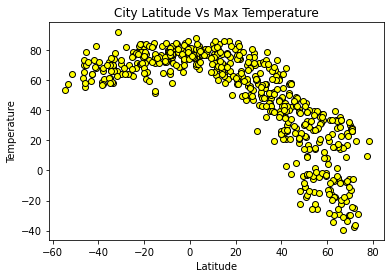

In [67]:
#lat vs Temp Scatter plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temperature"], facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("City Latitude Vs Max Temperature")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Temperature")
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

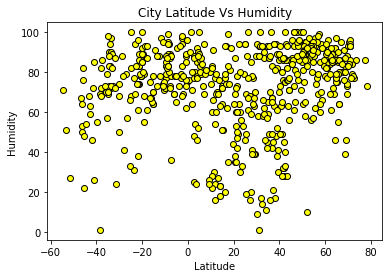

In [68]:
#lat vs Humidity Scatter plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("City Latitude Vs Humidity")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Humidity")
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

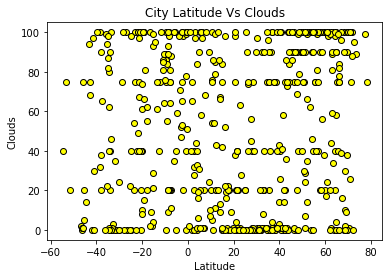

In [70]:
#lat vs Clouds Scatter plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Clouds"], facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("City Latitude Vs Clouds")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Clouds")
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

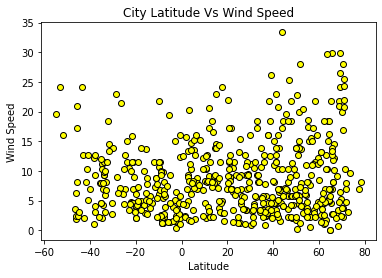

In [71]:
#lat vs Clouds Scatter plot
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("City Latitude Vs Wind Speed")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Wind Speed")
plt.show

## Linear Regression

In [76]:
northen_hemisphere = clean_city_data[clean_city_data["Latitude"] > 0]
southern_hemisphere = clean_city_data[clean_city_data["Latitude"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: -0.8446123028170132


<function matplotlib.pyplot.show(*args, **kw)>

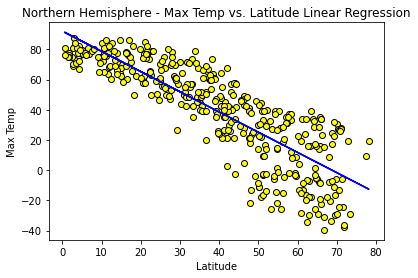

In [93]:
x_values = northen_hemisphere["Latitude"]
y_values = northen_hemisphere["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r-value: {rvalue}")
plt.plot(x_values, regress_values, color="b")
plt.scatter(x_values, y_values, facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Max Temp")
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: 0.5065636065409782


<function matplotlib.pyplot.show(*args, **kw)>

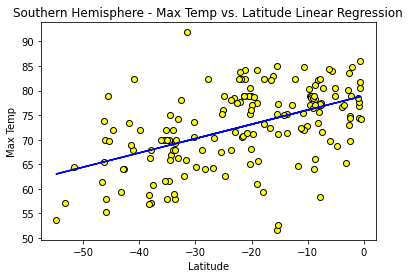

In [94]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r-value: {rvalue}")
plt.plot(x_values, regress_values, color="b")
plt.scatter(x_values, y_values, facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Max Temp")
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.30393512413507606


<function matplotlib.pyplot.show(*args, **kw)>

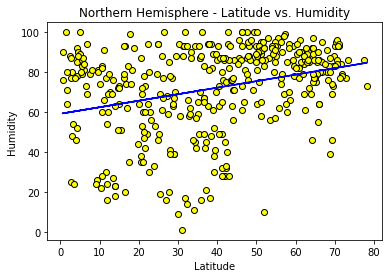

In [96]:
x_values = northen_hemisphere["Latitude"]
y_values = northen_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r-value: {rvalue}")
plt.plot(x_values, regress_values, color="b")
plt.scatter(x_values, y_values, facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("Northern Hemisphere - Latitude vs. Humidity")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Humidity")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.3917393664420828


<function matplotlib.pyplot.show(*args, **kw)>

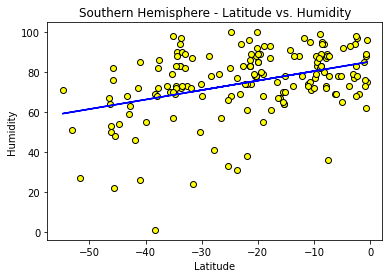

In [97]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r-value: {rvalue}")
plt.plot(x_values, regress_values, color="b")
plt.scatter(x_values, y_values, facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("Southern Hemisphere - Latitude vs. Humidity")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Humidity")
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.2842345223017262


<function matplotlib.pyplot.show(*args, **kw)>

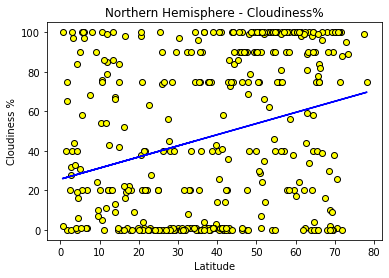

In [100]:
x_values = northen_hemisphere["Latitude"]
y_values = northen_hemisphere["Clouds"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r-value: {rvalue}")
plt.plot(x_values, regress_values, color="b")
plt.scatter(x_values, y_values, facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("Northern Hemisphere - Cloudiness%")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Cloudiness %")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.2858008933875218


<function matplotlib.pyplot.show(*args, **kw)>

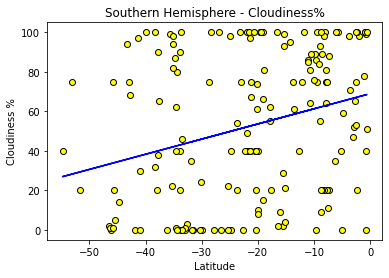

In [101]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Clouds"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r-value: {rvalue}")
plt.plot(x_values, regress_values, color="b")
plt.scatter(x_values, y_values, facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("Southern Hemisphere - Cloudiness%")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Cloudiness %")
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.09178444094114126


<function matplotlib.pyplot.show(*args, **kw)>

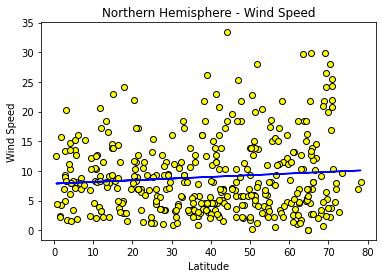

In [103]:
x_values = northen_hemisphere["Latitude"]
y_values = northen_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r-value: {rvalue}")
plt.plot(x_values, regress_values, color="b")
plt.scatter(x_values, y_values, facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("Northern Hemisphere - Wind Speed")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Wind Speed")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: -0.29995914956472747


<function matplotlib.pyplot.show(*args, **kw)>

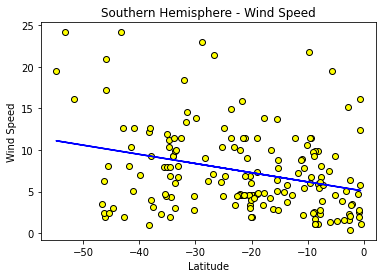

In [104]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"r-value: {rvalue}")
plt.plot(x_values, regress_values, color="b")
plt.scatter(x_values, y_values, facecolor= "yellow", edgecolor="black")
#Plot Title
plt.title("Southern Hemisphere - Wind Speed")
#X axis Label
plt.xlabel("Latitude")
#Y axis label
plt.ylabel("Wind Speed")
plt.show